# Part I - (201902-fordgobike-tripdata.csv)
## by (John Ekwere)

## Investigation Overview

> The overall goal of this presentation is to look at the individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Specifically, we will look at the trip duration in relation of age, user type and gender.


## Dataset Overview

> The dataset contains 183412 rows and 16 columns with some missing data. The average of the rides is approximately 726 seconds while the maximum and minimum rides are 85,444 and 61 seconds respectively.


In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike = df.copy()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration

> The trip duration ranges from 60 seconds to over 85,000 seconds. When plotted on a log scale shows a unimodal distribution. Most trips were around 500 seconds. 

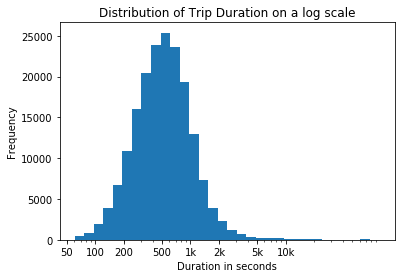

In [15]:
np.log10(df_bike['duration_sec']).describe()
bins = 10 ** np.arange(np.log10(df_bike['duration_sec']).min(), np.log10(df_bike['duration_sec']).max()+0.1, 0.1)
ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000]
labels = [50, 100, 200, 500, '1k', '2k', '5k', '10k']#['{}'.format(v) for v in ticks]
plt.hist(data = df_bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title("Distribution of Trip Duration on a log scale")
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
plt.legend();

## User Type Distribution
> Customers took longer trips than subscribers. To increase revenue, more customers should be retained.

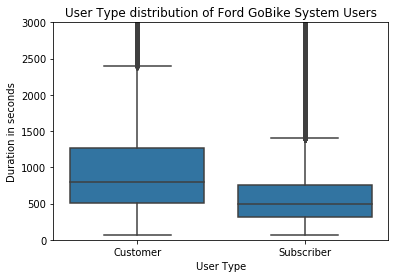

In [16]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df_bike, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim(0,3000)
plt.title("User Type distribution of Ford GoBike System Users")
plt.xlabel('User Type')
plt.ylabel('Duration in seconds')
plt.show()

## Age and Gender by Trip Duration
> Males were more inclined to take trips across the different ages even taking the most trips between 70 and 80 years which was quite rare for females and others.


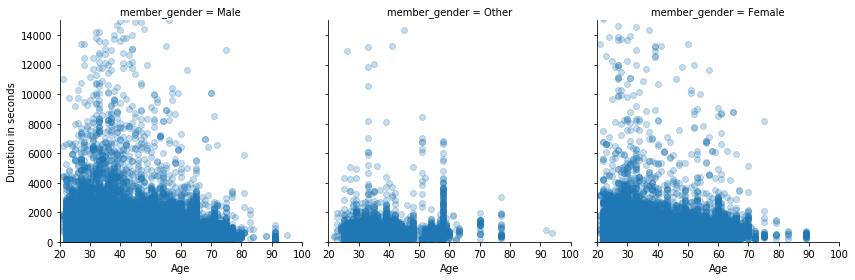

In [17]:
#create a new column for age to help with age distribution of members
df_bike['age'] = 2022 - df_bike['member_birth_year']
g = sb.FacetGrid(data = df_bike, col = 'member_gender', col_wrap = 3, size = 4, xlim = [20, 100], ylim = [0, 15000])
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
g.set_xlabels('Age')
g.set_ylabels('Duration in seconds')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 402040 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
